In [1]:
import numpy as np
import seaborn as sns
import geopandas as gpd

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
grid=gpd.read_file('grid2.shp')

In [3]:
err=[0,1,2,3,188,229,272,315]

In [4]:
bad_df = grid.index.isin(err)
grid=grid[~bad_df]
grid=grid.reset_index()
erro_grid=np.load('deleted_index.npy')
removedgrid=erro_grid[erro_grid<len(grid)]
bad_df = grid.index.isin(removedgrid)
grid=grid[~bad_df]
grid=grid.reset_index()

In [5]:
i=4
sus=np.load(f'vs/grid2LabelPRED.npy')
#sus=np.rint(sus).flatten()#np.argmax(sus.swapaxes(0,-1).reshape((10680, 4, 4, 3))[:,:,:,:2],axis=3).flatten()
sus_real=np.load(f'vs/grid2LabelORG.npy').flatten()
area_den=np.load(f'vs/Predicted_AreaDen.npy').flatten()
area_real=np.load(f'vs/Observed_AreaDen.npy').flatten()
haz=area_den*sus.flatten()
sus_org=sus.flatten()
sus=np.rint(sus).flatten()
#sus_real=np.argmax(label[:,:,:,:2],axis=-1).flatten()

In [17]:
from sklearn.metrics import f1_score,confusion_matrix
confusion_matrix(sus_real.flatten(),np.rint(sus.flatten()))

array([[140867,   2996],
       [   105,  26912]])

In [18]:
TP=sus_real*sus
FN=sus_real * (1-sus)
FP=(1-sus_real)*sus
TN=(1-sus_real)*(1-sus)

In [19]:
np.unique(sus,return_counts=True)

(array([0., 1.], dtype=float32), array([140972,  29908]))

In [29]:
# grid=grid[:-9]
grid=grid.to_crs(epsg=4326)

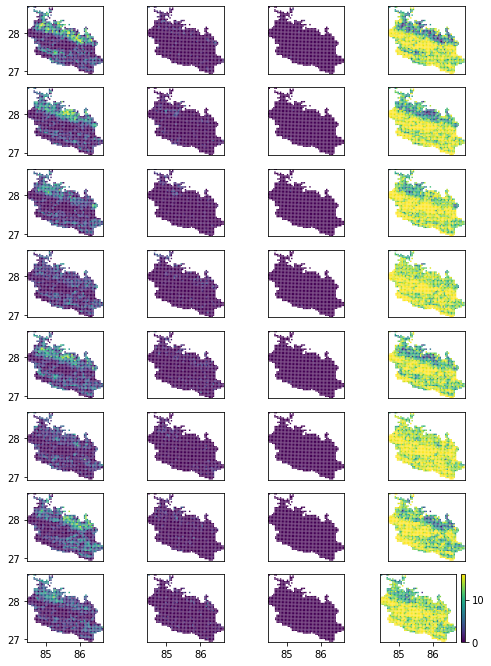

In [32]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=8,ncols=4,sharex=True,sharey=True,figsize=(8.27,11.69))
for i  in range(8):
    a=i
    b=i+1
    epoch=i+4
    TPSub=(TP[21360*a:21360*b].reshape(-1,16).sum(axis=1))
    FPSub=(FP[21360*a:21360*b].reshape(-1,16).sum(axis=1))
    FNSub=FN[21360*a:21360*b].reshape(-1,16).sum(axis=1)
    TNSub=TN[21360*a:21360*b].reshape(-1,16).sum(axis=1)
    grid[f'TP_{str(epoch)}']=TPSub
    grid[f'FP_{str(epoch)}']=FPSub
    grid[f'FN_{str(epoch)}']=FNSub
    grid[f'TN_{str(epoch)}']=TNSub
    if i<7:
        ax1=grid.plot(ax=axs[i,0], column=f'TP_{str(epoch)}',vmin=0,vmax=16,linewidth=0)
        ax1.margins(0)
        ax1.tick_params(left=True, labelleft=[28,28], bottom=False, labelbottom=False)
        ax2=grid.plot(ax=axs[i,1], column=f'FP_{str(epoch)}',vmin=0,vmax=16,linewidth=0)
        ax2.margins(0)
        ax2.tick_params(left=False, labelleft=False, bottom=False,labelbottom=False)
        ax3=grid.plot(ax=axs[i,2], column=f'FN_{str(epoch)}',linewidth=0,vmin=0,vmax=16)
        ax3.margins(0)
        ax3.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
        ax4=grid.plot(ax=axs[i,3], column=f'TN_{str(epoch)}',vmin=0,vmax=16,linewidth=0)
        ax4.margins(0)
        ax4.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    else:
        ax1=grid.plot(ax=axs[i,0], column=f'TP_{str(epoch)}',vmin=0,vmax=16,linewidth=0)
        ax1.margins(0)
        ax1.tick_params(left=True, labelleft=[27,28], bottom=True, labelbottom=[85,86])
        ax2=grid.plot(ax=axs[i,1], column=f'FP_{str(epoch)}',vmin=0,vmax=16,linewidth=0)
        ax2.margins(0)
        ax2.tick_params(left=False, labelleft=False, bottom=True, labelbottom=[85,86])
        ax3=grid.plot(ax=axs[i,2], column=f'FN_{str(epoch)}',linewidth=0,vmin=0,vmax=16)
        ax3.margins(0)
        ax3.tick_params(left=False, labelleft=False, bottom=True, labelbottom=[85,86])
        ax4=grid.plot(ax=axs[i,3], column=f'TN_{str(epoch)}',vmin=0,vmax=16,linewidth=0,legend=True)
        ax4.margins(0)
        ax4.tick_params(left=False, labelleft=False, bottom=True, labelbottom=[85,86])
     

In [ ]:
fig.savefig('ConfusionMaps_V2.svg', bbox_inches='tight', format='svg')
grid.to_file('PredictionsModelV3.shp')

In [20]:
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
length = 1000
wide = 1000
polygons = []
polygon=grid.geometry
def makegrid(geom):
    xmin, ymin, xmax, ymax = geom.bounds
    cols = list(np.arange(xmin, xmin + wide*4, wide))
    rows = list(np.arange(ymin, ymin + length*4, length))
    for x in cols:
        for y in rows:
            polygons.append(Polygon([(x,y), (x+wide, y), (x+wide, y+length), (x, y+length)]))
for i in range(len(polygon)):
    makegrid(polygon[i])
gridV2 = gpd.GeoDataFrame({'geometry':polygons},crs='EPSG:32645')

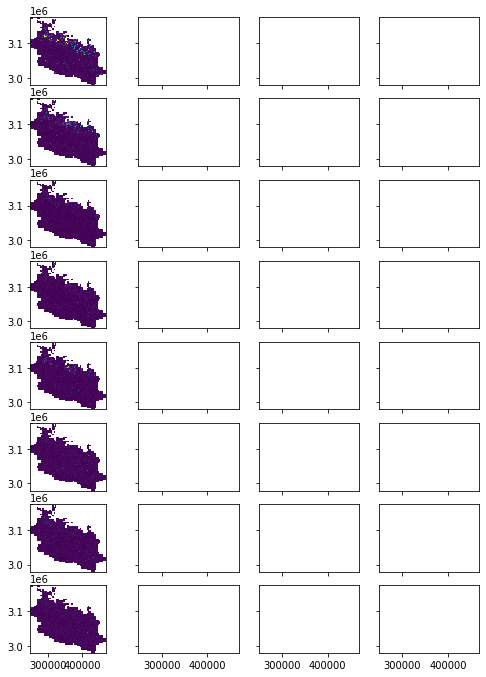

In [21]:
import matplotlib.pyplot as plt
grid=gridV2
fig, axs = plt.subplots(nrows=8,ncols=4,sharex=True,sharey=True,figsize=(8.27,11.69))
for i  in range(8):
    a=i
    b=i+1
    epoch=i+4
    TPSub=TP[21360*a:21360*b]#.reshape(-1,16).sum(axis=1))
    FPSub=FP[21360*a:21360*b]#.reshape(-1,16).sum(axis=1))
    FNSub=FN[21360*a:21360*b]#.reshape(-1,16).sum(axis=1)
    TNSub=TN[21360*a:21360*b]#.reshape(-1,16).sum(axis=1)
    # grid[f'TP_{str(epoch)}']=TPSub
    # grid[f'FP_{str(epoch)}']=FPSub
    # grid[f'FN_{str(epoch)}']=FNSub
    # grid[f'TN_{str(epoch)}']=TNSub
    grid[f'AreaDen_{str(epoch)}']=area_den[21360*a:21360*b]
    grid[f'ArDenEr_{str(epoch)}']=area_den[21360*a:21360*b]-area_real[21360*a:21360*b]
    grid[f'Haz_{str(epoch)}']=haz[21360*a:21360*b]
    if i<7:
        ax1=grid.plot(ax=axs[i,0], column=f'AreaDen_{str(epoch)}',vmin=0,vmax=16,linewidth=0)#,categorical=True)
        ax1.margins(0)
        ax1.tick_params(left=True, labelleft=[28,28], bottom=False, labelbottom=False)
        # ax2=grid.plot(ax=axs[i,1], column=f'FP_{str(epoch)}',vmin=0,vmax=16,linewidth=0)
        # ax2.margins(0)
        # ax2.tick_params(left=False, labelleft=False, bottom=False,labelbottom=False)
        # ax3=grid.plot(ax=axs[i,2], column=f'FN_{str(epoch)}',linewidth=0,vmin=0,vmax=16)
        # ax3.margins(0)
        # ax3.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
        # ax4=grid.plot(ax=axs[i,3], column=f'TN_{str(epoch)}',vmin=0,vmax=16,linewidth=0)
        # ax4.margins(0)
        # ax4.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    else:
        ax1=grid.plot(ax=axs[i,0], column=f'AreaDen_{str(epoch)}',vmin=0,vmax=16,linewidth=0)#,categorical=True,legend=True)
        ax1.margins(0)
        ax1.tick_params(left=True, labelleft=[27,28], bottom=True, labelbottom=[85,86])
        # ax2=grid.plot(ax=axs[i,1], column=f'FP_{str(epoch)}',vmin=0,vmax=16,linewidth=0)
        # ax2.margins(0)
        # ax2.tick_params(left=False, labelleft=False, bottom=True, labelbottom=[85,86])
        # ax3=grid.plot(ax=axs[i,2], column=f'FN_{str(epoch)}',linewidth=0,vmin=0,vmax=16)
        # ax3.margins(0)
        # ax3.tick_params(left=False, labelleft=False, bottom=True, labelbottom=[85,86])
        # ax4=grid.plot(ax=axs[i,3], column=f'TN_{str(epoch)}',vmin=0,vmax=16,linewidth=0,legend=True)
        # ax4.margins(0)
        # ax4.tick_params(left=False, labelleft=False, bottom=True, labelbottom=[85,86])
     

In [22]:
grid.to_file('PredictionsModelV3.shp')